In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools

In [2]:
df_raw = pd.read_csv('personality_datasert.csv')
df_raw

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [3]:
print(df_raw.head(5).to_latex(index=False).replace("_", "\\_"))

\begin{tabular}{rlrrlrrl}
\toprule
Time\_spent\_Alone & Stage\_fear & Social\_event\_attendance & Going\_outside & Drained\_after\_socializing & Friends\_circle\_size & Post\_frequency & Personality \\
\midrule
4.000000 & No & 4.000000 & 6.000000 & No & 13.000000 & 5.000000 & Extrovert \\
9.000000 & Yes & 0.000000 & 0.000000 & Yes & 0.000000 & 3.000000 & Introvert \\
9.000000 & Yes & 1.000000 & 2.000000 & Yes & 5.000000 & 2.000000 & Introvert \\
0.000000 & No & 6.000000 & 7.000000 & No & 14.000000 & 8.000000 & Extrovert \\
3.000000 & No & 9.000000 & 4.000000 & No & 8.000000 & 5.000000 & Extrovert \\
\bottomrule
\end{tabular}



In [4]:
df_raw.shape

(2900, 8)

In [5]:
df = df_raw.copy()

summary_stats = {
    " ": [
        "Mean",
        "Min",
        "Q1",
        "Median",
        "Q3",
        "Max",
        "Mode",
        "Var",
        "SD",
        "CV",
        "IQR"
    ]
}

quantitative_cols = [
    'Post_frequency',
    'Friends_circle_size',
    'Going_outside',
    'Social_event_attendance',
    'Time_spent_Alone'
]

def create_summary_df(df, quantitative_cols):
    for col in quantitative_cols:
        data = df[col]
        mean_val = data.mean()
        std_val = data.std()
        mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan
        variance_val = data.var()
        cv_val = std_val / mean_val if mean_val != 0 else np.nan

        summary_stats[col] = [
            mean_val,
            data.min(),
            data.quantile(0.25),
            data.median(),
            data.quantile(0.75),
            data.max(),
            mode_val,
            variance_val,
            std_val,
            cv_val,
            data.quantile(0.75) - data.quantile(0.25)
        ]

    formatted_summary_df = pd.DataFrame(summary_stats).copy()

    for col in formatted_summary_df.columns[1:]:  # Skip "Thông số thống kê"
        formatted_summary_df[col] = formatted_summary_df[col].apply(lambda x: f'{x:,.4f}' if isinstance(x, (int, float)) else x)

    return formatted_summary_df

formatted_summary_df = create_summary_df(df, quantitative_cols)
formatted_summary_df = formatted_summary_df.applymap(lambda x: x.rstrip('0').rstrip('.') if isinstance(x, str) else x)
formatted_summary_df

C:\Users\PC\AppData\Local\Temp\ipykernel_47012\517187609.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_summary_df = formatted_summary_df.applymap(lambda x: x.rstrip('0').rstrip('.') if isinstance(x, str) else x)


,,Post_frequency,Friends_circle_size,Going_outside,Social_event_attendance,Time_spent_Alone
0,Mean,3.5647,6.2689,3,3.9634,4.5058
1,Min,0,0,0,0,0
2,Q1,1,3,1,2,2
3,Median,3,5,3,3.9634,4
4,Q3,6,10,5,6,7
5,Max,10,15,7,10,11
6,Mode,2,5,0,2,0
7,Var,8.3728,17.9127,4.9355,8.2519,11.8417
8,SD,2.8936,4.2323,2.2216,2.8726,3.4412
9,CV,0.8117,0.6751,0.7405,0.7248,0.7637


In [6]:
print(formatted_summary_df.to_latex(index=False).replace("_", "\\_"))

\begin{tabular}{llllll}
\toprule
  & Post\_frequency & Friends\_circle\_size & Going\_outside & Social\_event\_attendance & Time\_spent\_Alone \\
\midrule
Mean & 3.5647 & 6.2689 & 3 & 3.9634 & 4.5058 \\
Min & 0 & 0 & 0 & 0 & 0 \\
Q1 & 1 & 3 & 1 & 2 & 2 \\
Median & 3 & 5 & 3 & 3.9634 & 4 \\
Q3 & 6 & 10 & 5 & 6 & 7 \\
Max & 10 & 15 & 7 & 10 & 11 \\
Mode & 2 & 5 & 0 & 2 & 0 \\
Var & 8.3728 & 17.9127 & 4.9355 & 8.2519 & 11.8417 \\
SD & 2.8936 & 4.2323 & 2.2216 & 2.8726 & 3.4412 \\
CV & 0.8117 & 0.6751 & 0.7405 & 0.7248 & 0.7637 \\
IQR & 5 & 7 & 4 & 4 & 5 \\
\bottomrule
\end{tabular}



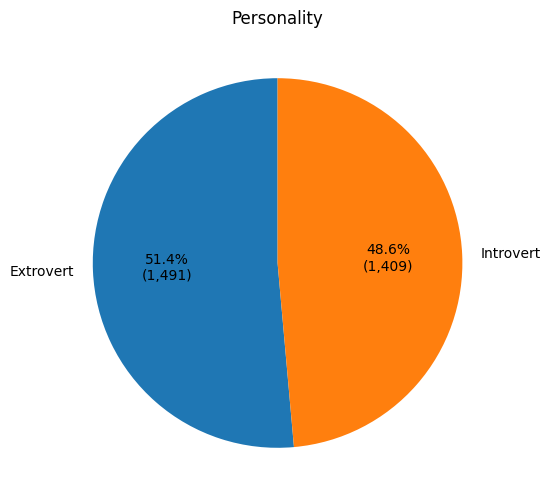

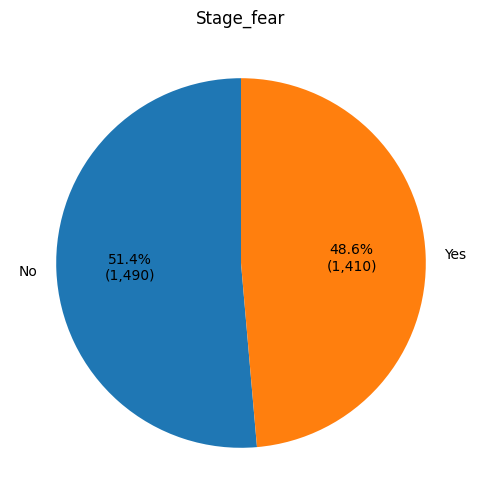

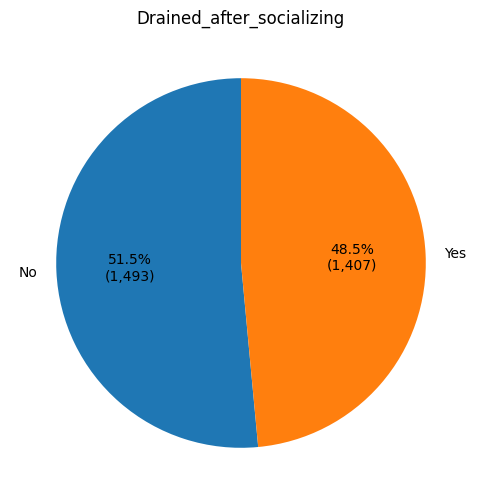

In [12]:
plt.figure(figsize=(10, 6))
counts = df['Personality'].value_counts()

def autopct_format(pct):
    total = sum(counts)
    count = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({count:,})'

plt.pie(
    counts,
    labels=counts.index,
    autopct=autopct_format,
    startangle=90,
)
plt.title('Personality')
plt.show()

plt.figure(figsize=(10, 6))
counts = df['Stage_fear'].value_counts()

def autopct_format(pct):
    total = sum(counts)
    count = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({count:,})'

plt.pie(
    counts,
    labels=counts.index,
    autopct=autopct_format,
    startangle=90,
)
plt.title('Stage_fear')
plt.show()

plt.figure(figsize=(10, 6))
counts = df['Drained_after_socializing'].value_counts()

def autopct_format(pct):
    total = sum(counts)
    count = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({count:,})'

plt.pie(
    counts,
    labels=counts.index,
    autopct=autopct_format,
    startangle=90,
)
plt.title('Drained_after_socializing')
plt.show()

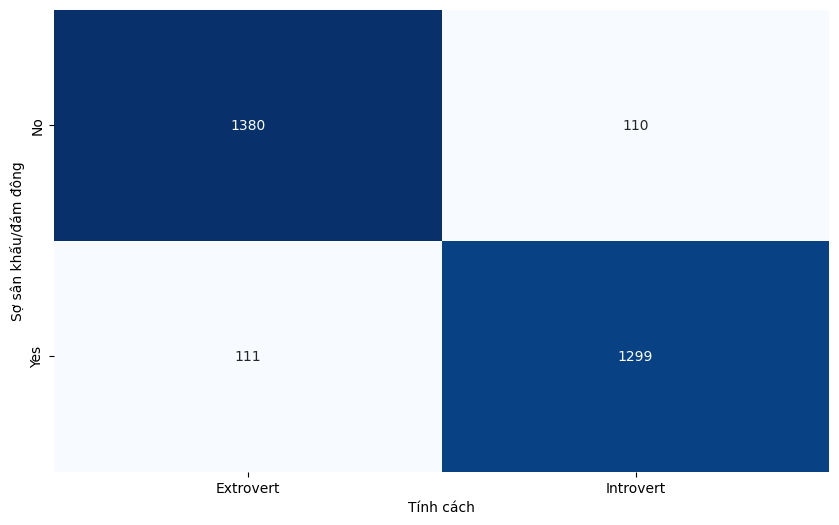

In [29]:
# heat map stage_fear vs personality
plt.figure(figsize=(10, 6))
sns.heatmap(
    pd.crosstab(df['Stage_fear'], df['Personality']),
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=df['Personality'].unique(),
    yticklabels=df['Stage_fear'].unique()
)

plt.xlabel('Tính cách')
plt.ylabel('Sợ sân khấu/đám đông')
plt.show()


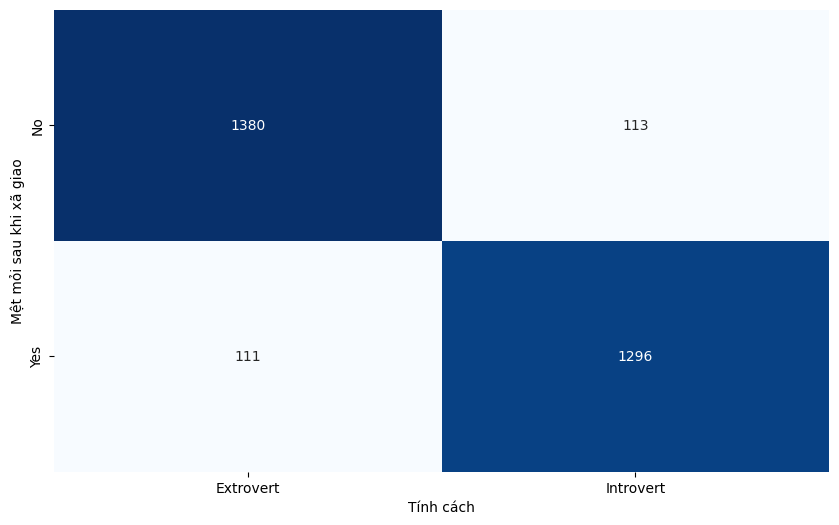

In [30]:
# heat map stage_fear vs personality
plt.figure(figsize=(10, 6))
sns.heatmap(
    pd.crosstab(df['Drained_after_socializing'], df['Personality']),
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=df['Personality'].unique(),
    yticklabels=df['Drained_after_socializing'].unique()
)

plt.xlabel('Tính cách')
plt.ylabel('Mệt mỏi sau khi xã giao')
plt.show()


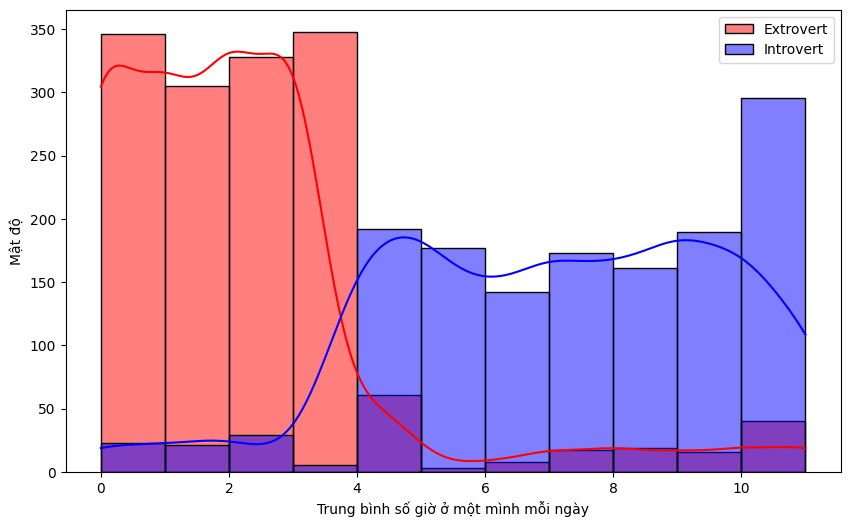

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Personality'] == 'Extrovert']['Time_spent_Alone'], color='red', label='Extrovert', kde=True, stat='count', bins=11)
sns.histplot(df[df['Personality'] == 'Introvert']['Time_spent_Alone'], color='blue', label='Introvert', kde=True, stat='count', bins=11)

plt.xlabel('Trung bình số giờ ở một mình mỗi ngày')
plt.ylabel('Mật độ')
plt.legend()
plt.show()

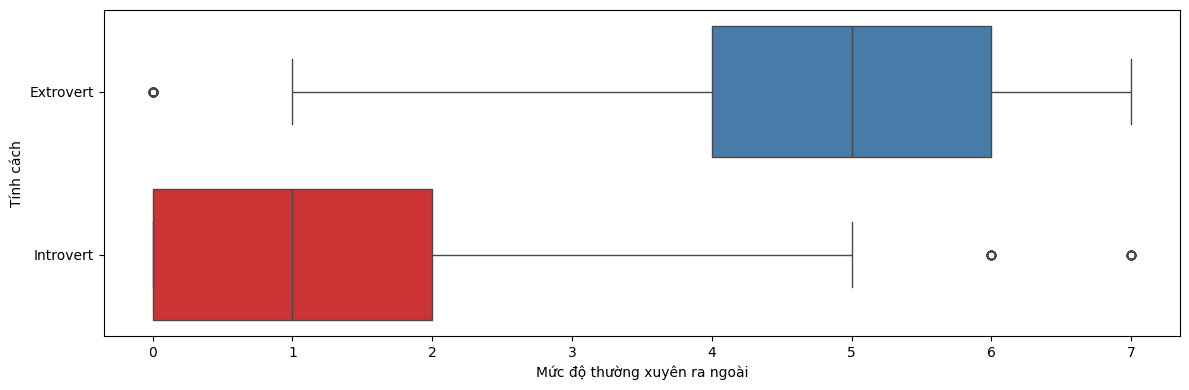

In [31]:
grouped = df.groupby('Personality')['Going_outside']
quartiles = grouped.quantile([0.25, 0.5, 0.75]).unstack()
quartiles.columns = ['Q1', 'Median', 'Q3']
quartiles['IQR'] = quartiles['Q3'] - quartiles['Q1']

whisk = {}
for lvl, row in quartiles.iterrows():
    data = df.loc[df['Personality']==lvl, 'Going_outside']
    lower_bound = row['Q1'] - 1.5 * row['IQR']
    upper_bound = row['Q3'] + 1.5 * row['IQR']
    lower_whisk = data[data >= lower_bound].min()
    upper_whisk = data[data <= upper_bound].max()
    whisk[lvl] = (lower_whisk, upper_whisk)

fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(
    data=df,
    y='Personality',
    x='Going_outside',
    hue='Personality',
    palette='Set1',
    hue_order=['Introvert', 'Extrovert'],
    orient='h',
    ax=ax
)

ax.set_ylabel('Tính cách')
ax.set_xlabel('Mức độ thường xuyên ra ngoài')

plt.tight_layout()
plt.show()


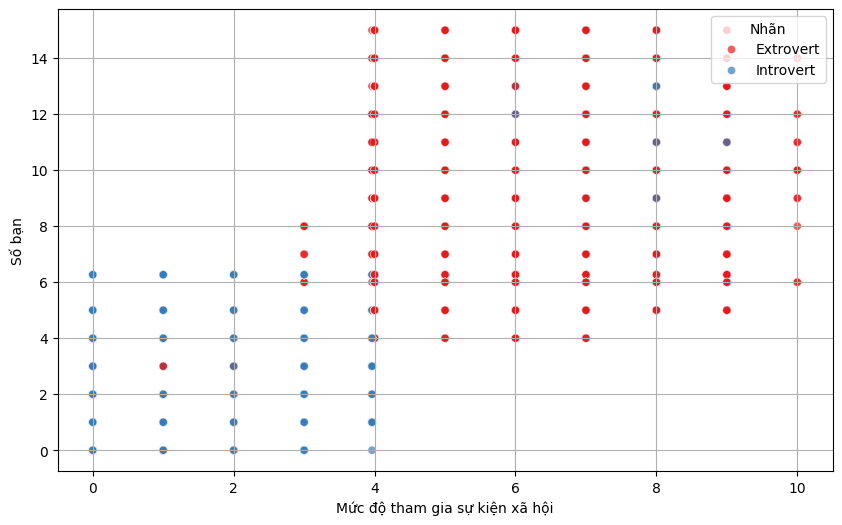

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Social_event_attendance',
    y='Friends_circle_size',
    hue='Personality',
    palette='Set1',
    hue_order=['Extrovert', 'Introvert'],
    alpha=0.7
)
plt.xlabel('Mức độ tham gia sự kiện xã hội')
plt.ylabel('Số bạn')
plt.legend(title='Nhãn', loc='upper right')
plt.grid(True)
plt.show()
